---
# Übungszettel 4, Python Aufgabe
---

**ausgegeben am Mi 13.5.2020 12 Uhr, abzugeben bis Mi 20.5.2020 12 Uhr**

Bearbeitet von: Justus Multhaup

Zusammenarbeit mit:

Übungsgruppe: Laura Strampe

---

**Einführung**: In der Vorlesung haben Sie den idealen Plattenkondensator ausführlich kennen gelernt. In der Realität gibt es viele Situationen, die sich, bis auf kleine Störungen, fast wie Plattenkondensatoren verhalten. Wir wollen hier eine dieser Situationen numerisch behandeln: den Plattenkondensator mit einer winzigen Erhebung auf einer der Platten. Dies stellt z.B. einen Kondensator mit einer Verunreinigung an einer Stelle dar oder auch den Erdboden mit Gebäuden gegenüber geladener Wolken bei einem Gewitter.

Das Ziel der Aufgabe soll sein fancy-indexing sowie die Gauß-Seidel und die finite Differenzen Methoden in Python kennen zu lernen. Außerdem soll eine Vorstellung davon vermittelt werden welche Folgen Imperfektionen haben und wie sich dies auf reale Situationen übertragen lässt.

<img src="Rastergrafik.png" alt="drawing" width="400"/>

**Aufgabe**: Berechnen Sie das Potential eines Plattenkondensators in 2D mit einer kleinen, lokalen Erhebung auf einer der Platten mit Hilfe der Laplace-Gleichung, finiter Differenzen und der Gauß-Seidel-Methode. Nutzen Sie fancy-indexing zur Vereinfachung. Erklären Sie mit dem Ergebnis warum Blitze oft in Türmen einschlagen oder warum Spannungsdurchbrüche in Kondensatoren an den Stellen von Störungen entstehen. Diskutieren Sie, was passiert, wenn die Platten leitfähig sind.

1. Definieren Sie ein Gitter für das Elektrostatische Potential `phi`, nehmen Sie an, dass eine Platte positiv geladen ist (beim Gewitter die Wolken auf +100'000 V) und eine negativ geladen (beim Gewitter der Boden -100'000 V). Füllen Sie den Zwischenraum mit dem Potential eines idealen Plattenkondensators.

2. Führen Sie eine Imperfektion mittig auf eine der Platten ein (beim Gewitter z.B. 100 m hoher Turm auf dem Boden) und setzen Sie diese auf das Potential der Platte.

3. Lösen Sie die Laplace-Gleichung überall im Inneren des Kondensators (sparen Sie die Ränder, die Platten und die Imperfektion / den Turm aus). Das heißt für das Innere des Kondensators kann das Potential $\phi_{i,j}$ am Gitterpunkt $i,j$, ausgehend von einem anfänglichen Schätzwert, iterativ nach folgender Vorschrift verfeinert werden:
$$\frac{2\phi_{i,j}}{\Delta x^{2}}+\frac{2\phi_{i,j}}{\Delta y^{2}}=\frac{\phi_{i+1,j}+\phi_{i-1,j}}{\Delta x^{2}}+\frac{\phi_{i,j+1}+\phi_{i,j-1}}{\Delta y^{2}}$$
Wenn für die Gitterkonstanten $\Delta x = \Delta y$ gilt, vereinfacht sich das zu:
$$\phi_{i,j}=\frac{\phi_{i+1,j}+\phi_{i-1,j}+\phi_{i,j+1}+\phi_{i,j-1}}{4}$$

4. Plotten Sie die elektrische Feldstärke $\left|\vec{E}\left(\vec{r}\right)\right|$ und begründen Sie, warum Spannungsdurchbrüche oder Blitze vor allem von der kleinen Erhebung ausgehen. Wo hin fließen Ladungsträger, wenn Sie der Komponente des Feldes parallel zur Oberfläche folgen und verstärkt sich dadurch die Aufladung der Turmspitze / Imperfektion?

**Vorgehensweise**: Wir rechnen hier das Beispiel des Gewitters. Sie müssen nicht diesem Rezept folgen, wir empfehlen aber folgende Schritte:

1. Erzeugen Sie ein `numpy.meshgrid` eines 2D Schnittes einer Landschaft mit Kantenlänge $10 \times 10$ km. Damit ein 100 m hoher Turm aufgelöst werden kann, empfiehlt es sich mindestens 101 Gitterpunkte in $x$ und $y$-Richtung zu verwenden. Wir wollen die Gitter `x,y` nennen. *Achtung: es empfiehlt sich die Gitterkonstante, also den Abstand benachbarter Gitterpunkte, für diese Aufgabe in $x$ und $y$ gleich zu wählen, weil sich die Aufgabe dadurch vereinfacht*.

2. Erzeugen Sie ein `numpy.array` des Potentials `phi`. Die Erdoberfläche solle dabei auf -100'000 V geladen sein und die Wolkenfläche auf +100'000 V. Eine gute Möglichkeit ist die Verwendung von `numpy.tile`, welches ein `array` als erstes Argument nimmt (hier z.B. aus `linspace`) und die Form als zweites Argument (z.B. `(101,1)`). Transponieren Sie gegebenenfalls das Resultat. Wählen Sie an der Nähe der Erdoberfläche einen oder mehrere Punkte mittig über dem Boden aus, die einem Turm von 100 m oder mehr entsprechen und setzen Sie diese auf das Erdpotential.

3. Erzeugen Sie ein Array `electrodes`, das überall `True` ist, wo Elektroden sind (inklusive des Turms) und `False` sonst. Nutzen Sie dafür die `numpy.full` Funktion, die eine Form des Arrays als erstes Argument nimmt (z.B. `(101,101)`) und die Füllung als zweites Argument (z.B. `False`). Nutzen Sie fancy indexing um die "Elektroden" `True` zu setzen. Setzen Sie dannach die Gitterpunkte des "Turms" auch `True`.

4. Lösen Sie die Laplace-Gleichung iterativ mit Hilfe der Gauß-Seidel Methode wie oben angegeben. Setzen Sie dabei die Formel von oben in Python mit Hilfe von fancy-indexing um (nicht manuell durch das Gitter iterieren und nicht vergessen die Ränder auszusparen!). Da in Python `False` und `True` als `0` und `1` gewertet werden, können Sie den Turm aussparen, indem Sie folgende Updatevorschrift verwenden:
$$\phi_{i,j}=\left(1-\mathtt{electrodes}_{i,j}\right)\frac{\phi_{i+1,j}+\phi_{i-1,j}+\phi_{i,j+1}+\phi_{i,j-1}}{4}+\mathtt{electrodes}_{i,j}\phi_{i,j}$$
Wiederholen Sie diese Updates etwa 100 bis 200 mal für das ganze Gitter um grob konvergiert zu sein.

5. Berechnen Sie die $x$ und $y$-Komponente des elektrischen Feldes mit Hilfe von `numpy.gradient`. Um von "Gittereinheiten" zu physikalischen Einheiten zu kommen, teilen Sie die Komponenten durch die Gitterkonstanten (also z.B. $E_x$ durch $\Delta x$).

6. Betrachten Sie die Stärke des Feldes in der Nähe der Oberfläche.  Plotten Sie die Feldstärke $\left|\vec{E}\left(\vec{r}\right)\right|$ mit Hilfe von `pcolormesh` und `numpy.sqrt`. Wobei `pcolormesh` hier mindestens das Gitter `x,y` und die Feldstärke als Argument benötigt. Sie können die Darstellung mit `shading='gouraud'` als Argument verbessern. Mit `plt.colorbar()` erhalten Sie eine Skala im Plot.

7. Betrachten Sie die den Plot und versuchen Sie Frage 4 der Aufgabe zu beantworten.

**Hilfestellung**: Arrays in `numpy` können durch Angabe von *start:step:stop* indiziert werden. z.B. um die erste Reihe des Arrays `A` ($100 \times 100$) zu indizieren: `A[0,0:1:99]`. Alternativ kann man auch Intervalgrenzen relativ zum Ende des Arrays angeben: `A[0,0:1:-1]` (-1 ist hier dabei das Ende) oder für 2er Schritte `A[0,0:2:-1]`. Standardmäßig sind die Werte für *start*, *step* und *stop*: 0,1 und -1. Lässt man Werte weg, so werden diese Zahlen genutzt. Also sind folgende Schreibweisen äquivalent `A[0,0:1:-1]`, `A[0,0:1:]`, `A[0,:1:]`, `A[0,0:-1]`, `A[0,0:]`, `A[0,:-1]` und `A[0,:]`. Das kann in mehreren Dimensionen einfach kombiniert werden; die Reihen 2 bis 5, Spalten 4 bis Ende von `A` wären z.B. `A[1:4,3:]`.

In [9]:
import numpy as np
import matplotlib.pyplot as plt

##Kantenlänge 
l = 10000

##Potential bei 10km und am Erdboden
ground = -100000
clouds = 100000

##Steigung des Potentials
slope = (clouds - ground) / l

##Potential in Höhe y (Annahme eines linearen Verlaufes)
def phi(y):
    return ground + slope * y

rx = np.linspace(0, l, 101)
ry = np.linspace(0, l, 101)

x, y = np.meshgrid(rx, ry)

##Potentialarray
pot = np.tile(phi(ry), (101,1))
pot = np.transpose(pot)

#Turm
pot[1, 50] = ground

##Elektroden
electrodes = np.full((101, 101), False)
electrodes[0,0:] = True
electrodes[100,0:] = True
electrodes[1, 50] = True




for i in range(1000):
    pot[1:1:-2, 1:1:-2] = (1 - electrodes[1:1:-2, 1:1:-2]) * 0.25\
    * (pot[2:1:-2, 1:1:-2] + pot[0:1:-2,1:1:-2] + pot[1:1:-2, 2:1:-2] + pot[1:1:-2,0:1:-2])\
    + electrodes[1:1:-2, 1:1:-2] * pot[1:1:-2, 1:1:-2]



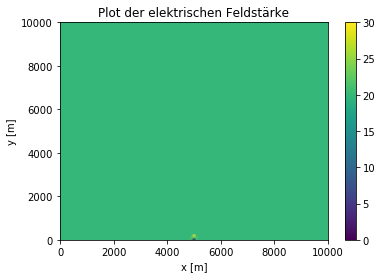

In [28]:
##Feld

Ey, Ex = np.gradient(pot)
Ex /= 100
Ey /= 100
E = np.sqrt(Ex**2 + Ey**2)

plt.pcolormesh(x, y, E, shading = 'gouraud')
plt.colorbar()
plt.title("Plot der elektrischen Feldstärke")
plt.xlabel("x [m]")
plt.ylabel("y [m]")

plt.show()





---
**Erste Hilfe Python:**
* Online-Sprechstunde jeden Montag und Freitag im Semester von 16-17 Uhr über BigBlueButton
* Studiengruppe im StudIP mit dem Titel “Erste Hilfe Python der SUB Göttingen”
* Übersichts-Pad ( https://pad.gwdg.de/ErsteHilfePython ) als alternative Anlaufstelle

In [31]:
print("An der Spitze des Turmes herrscht eine höhere Feldstärke als am Fuß und in dessen Umgebung. ")
print("Das liegt daran, dass die Wolken die Spitze durch Influenz aufladen.")
print("Bei leitenden Materialien wandern weitere Ladungen mit der parallelen Feldkompontente in Richtung der Turmspitze,")
print("sodass sich diese weiter auflädt. Aufgrund der erhöhten Potentialdifferenz relativ zu den Wolken schlagen in der Turmspitze öfter Blitze ein.")

An der Spitze des Turmes herrscht eine höhere Feldstärke als am Fuß und in dessen Umgebung. 
Das liegt daran, dass die Wolken die Spitze durch Influenz aufladen.
Bei leitenden Materialien wandern weitere Ladungen mit der parallelen Feldkompontente in Richtung der Turmspitze,
sodass sich diese weiter auflädt. Aufgrund der erhöhten Potentialdifferenz relativ zu den Wolken schlagen in der Turmspitze öfter Blitze ein.
